In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('full_filled_stroke_data (1).csv')
df[:3]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.555602,never smoked,1
1,Female,59.0,0,0,Yes,Private,Rural,76.15,30.242937,Unknown,1
2,Male,78.0,0,1,Yes,Private,Urban,219.84,30.698951,Unknown,1


In [28]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### we will keep columns 'age', 'avg_glucose_level', 'bmi', 'stroke'

In [29]:
df.drop(columns=['gender','hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 
       'smoking_status'],inplace=True)

In [30]:
df[:2]

,age,avg_glucose_level,bmi,stroke
0,61.0,202.21,31.555602,1
1,59.0,76.15,30.242937,1


#### Here we will check  if brain stroke is possible or not

In [31]:
x = df.drop(columns=['stroke'])
x[:2]

,age,avg_glucose_level,bmi
0,61.0,202.21,31.555602
1,59.0,76.15,30.242937


In [32]:
y = df.stroke
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# Split Dataset

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size= 0.8,random_state=42)
x_train.head()

,age,avg_glucose_level,bmi
198,45.0,95.02,31.798304
38,74.0,60.98,28.070472
24,79.0,169.67,27.971857
122,79.0,213.38,30.504872
196,41.0,70.15,29.756631


In [35]:
x_test[:3]

,age,avg_glucose_level,bmi
95,32.0,95.58,29.752554
15,66.0,101.45,29.292953
30,79.0,60.94,28.759856


In [36]:
y_test.head()

95     0
15     1
30     1
158    0
128    0
Name: stroke, dtype: int64

# USE STANDARD SCALER

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_transform = ss.fit_transform(x_train)
x_test_transform = ss.transform(x_test)

# 1. Prepare GAUSSIAN  Model 

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb = GaussianNB()
gnb

GaussianNB()

# Model Training

In [40]:
gnb.fit(x_train_transform,y_train)

GaussianNB()

# Model Testing

In [75]:
y_pred = gnb.predict(x_test_transform)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [42]:
y_test[:3]

95    0
15    1
30    1
Name: stroke, dtype: int64

# Checking performance Accuracy measures

In [43]:
from sklearn.metrics import confusion_matrix

In [76]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[34,  2],
       [ 3,  2]], dtype=int64)

# HEATMAP

In [45]:
lb = np.unique(y_test)
lb

array([0, 1], dtype=int64)

Text(33.0, 0.5, 'Actuall')

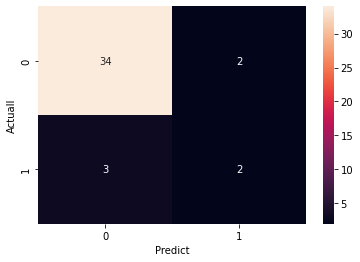

In [46]:
ax = sns.heatmap(cm,annot = True,xticklabels=lb,yticklabels=lb)
ax.set_xlabel('Predict')
ax.set_ylabel('Actuall')


# ACCURACY SCORE

In [47]:
from sklearn.metrics import accuracy_score

In [77]:
ac = accuracy_score(y_test,y_pred)*100
ac

87.8048780487805

# 2. Prepare BERNOULLI MODEL

In [49]:
from sklearn.naive_bayes import BernoulliNB


In [50]:
bnb = BernoulliNB()
bnb

BernoulliNB()

# Model Training

In [71]:
bnb.fit(x_train_transform,y_train)

BernoulliNB()

# Model Testing 

In [72]:
y_pred2 = bnb.predict(x_test_transform)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

# Checking performance using Accuracy Measures

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
cm1 = confusion_matrix(y_test,y_pred2)
cm1

array([[36,  0],
       [ 5,  0]], dtype=int64)

# Heatmap

Text(33.0, 0.5, 'Actual')

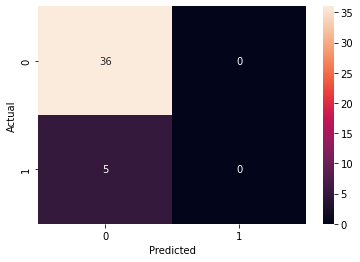

In [65]:
ax = sns.heatmap(cm1,annot=True)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Accuracy_score

In [55]:
from sklearn.metrics import accuracy_score

In [73]:
ac = accuracy_score(y_test,y_pred2)*100
ac

87.8048780487805

# 3. Model Preparing Multinomial

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
mnb = MultinomialNB()
mnb

MultinomialNB()

# Model Training

In [59]:
mnb.fit(x_train,y_train)

MultinomialNB()

# Model Testing

In [60]:
y_pred3 = mnb.predict(x_test)
y_pred3

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

# Accuracy Measures

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
ac = accuracy_score(y_test,y_pred3)*100
ac

80.48780487804879

# Confusion Matrix and Heatmap 

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
cm3 = confusion_matrix(y_test,y_pred3)
cm3

array([[28,  8],
       [ 0,  5]], dtype=int64)

Text(33.0, 0.5, 'Actual')

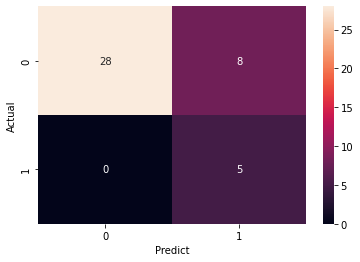

In [78]:
ax = sns.heatmap(cm3,annot=True)
ax.set_xlabel('Predict')
ax.set_ylabel('Actual')